In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

In [2]:
inspections_df = pd.read_csv('CSV Files/inspections_df.csv')

#### Summary of Numerical & Categorical Data

In [3]:
#Categorical Data

inspections_df.describe(include=["O"])

,establishment_name,cuisine_description,inspection_type,action,critical_flag,violation_code,violation_category,grade,borough
count,210560,210560,210560,210560,210560,210560,210560,210560,210560
unique,20903,23,5,4,2,49,6,5,5
top,DUNKIN,American,Initial Inspection,Had Violations,Critical,10F,Food Handling Violations,PEN,Manhattan
freq,2802,46624,155539,204696,118399,31960,75588,110801,77194


In [4]:
#Numerical Data

inspections_df.describe()

,inspection_year,score,latitude,longitude
count,210560.000000,210560.000000,210560.000000,210560.000000
mean,2022.511930,20.889281,40.201240,-72.989530
std,1.147759,13.422504,4.593477,8.339361
min,2015.000000,0.000000,0.000000,-74.248708
25%,2022.000000,11.000000,40.681920,-73.989218
50%,2023.000000,18.000000,40.729743,-73.957098
75%,2023.000000,29.000000,40.760714,-73.896273
max,2024.000000,59.000000,40.912822,0.000000


#### Conclusion

- There are many repeated establishments (either multiple inspections, many chain restaurants or a combination)
- Dunkin Donuts is the establishment with the highest number of inspections (there are many Dunkin)
- The most common violation code is 10F related to Cleaning and Sanitation Violations. However, Food Handling Violations such as temperature control, storage, source or preparation is the most common violation category

#### Distribution of Inspection Scores using a Histogram

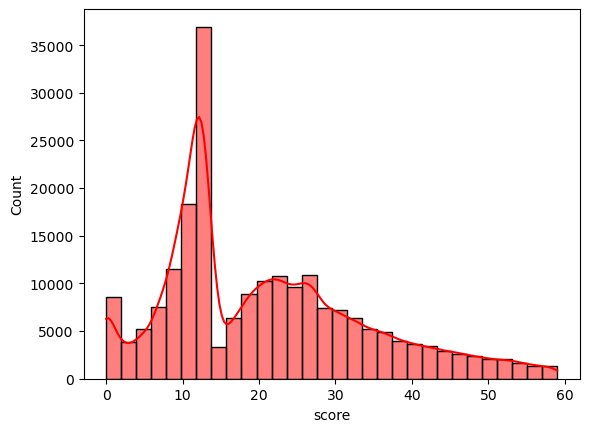

In [5]:
sns.histplot(inspections_df['score'], kde=True, bins=30, color="red");

In [6]:
#The most common score was around 14 points of violations (the higher the score the more violations it had)

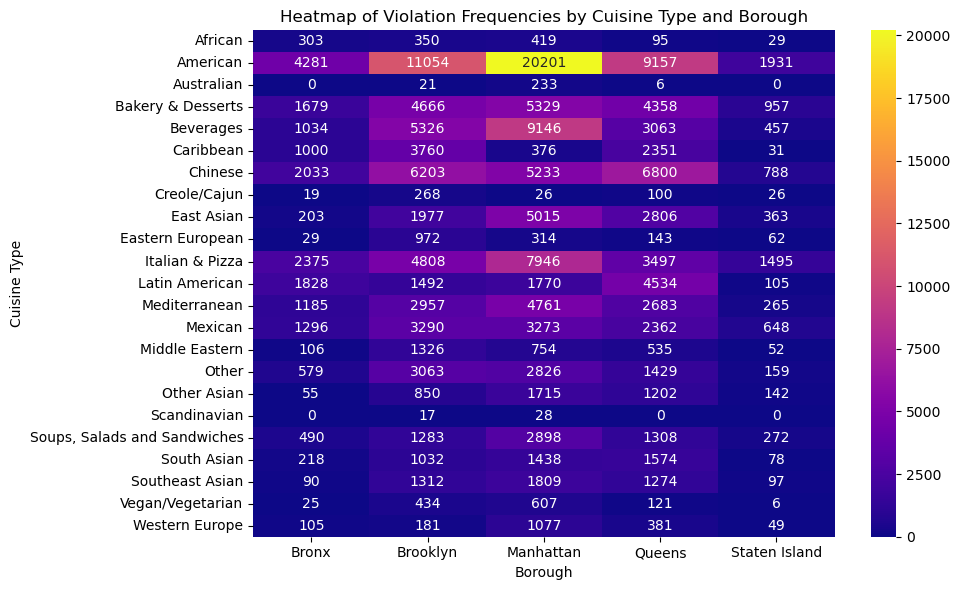

In [7]:
# Pivot Table to count the number of violations for each cuisine_description and location
heatmap_data = inspections_df.pivot_table(index='cuisine_description', columns='borough', aggfunc='size', fill_value=0)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the Heatmap
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="plasma", cbar=True)

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Cuisine Type')
plt.title('Heatmap of Violation Frequencies by Cuisine Type and Borough')

# Show the plot
plt.tight_layout()
plt.show()

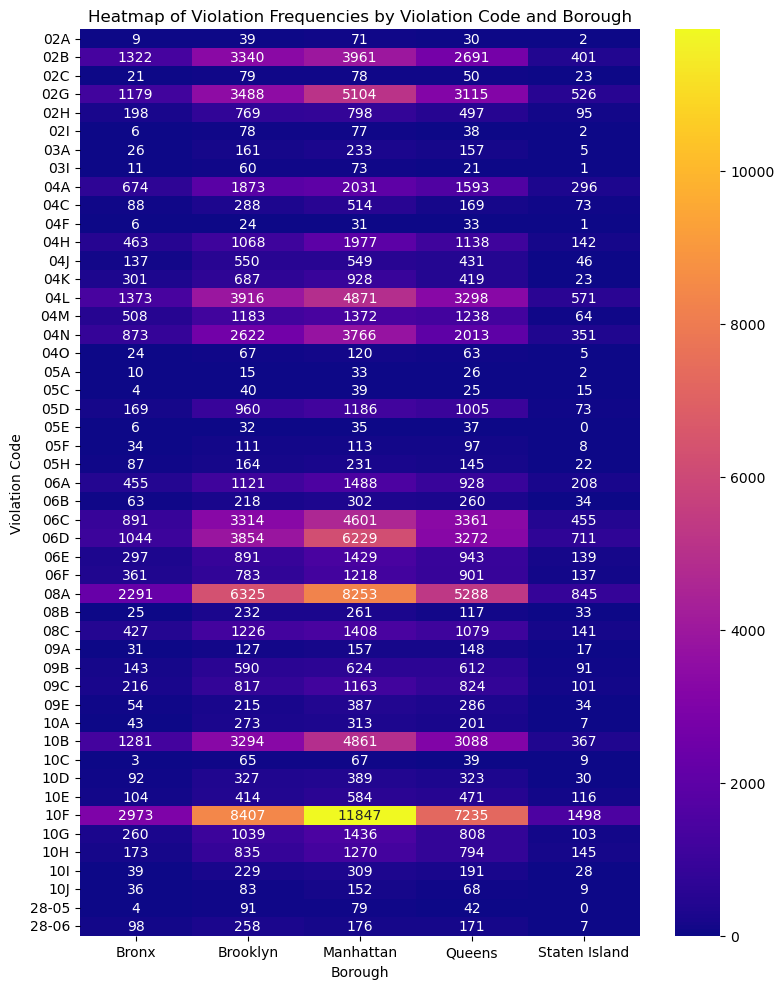

In [8]:
# Pivot Table to count the number of violations for each cuisine_description and location
heatmap_data = inspections_df.pivot_table(index='violation_code', columns='borough', aggfunc='size', fill_value=0)

# Set the figure size
plt.figure(figsize=(8, 10))

# Create the Heatmap
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="plasma", cbar=True)

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Violation Code')
plt.title('Heatmap of Violation Frequencies by Violation Code and Borough')

# Show the plot
plt.tight_layout()
plt.show()

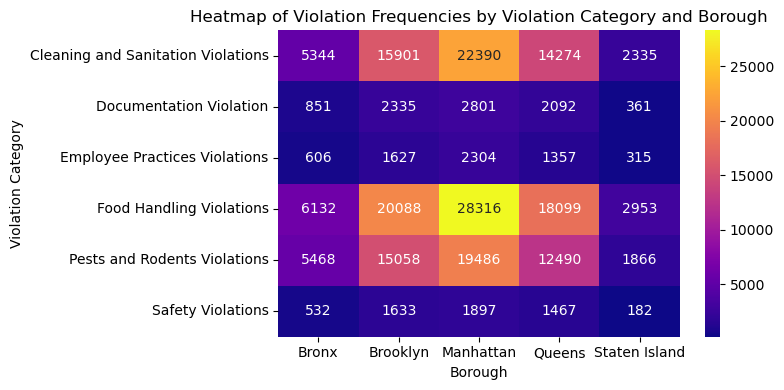

In [9]:
# Pivot Table to count the number of violations for each cuisine_description and location
heatmap_data = inspections_df.pivot_table(index='violation_category', columns='borough', aggfunc='size', fill_value=0)

# Set the figure size
plt.figure(figsize=(8, 4))

# Create the Heatmap
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="plasma", cbar=True)

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Violation Category')
plt.title('Heatmap of Violation Frequencies by Violation Category and Borough')

# Show the plot
plt.tight_layout()
plt.show()

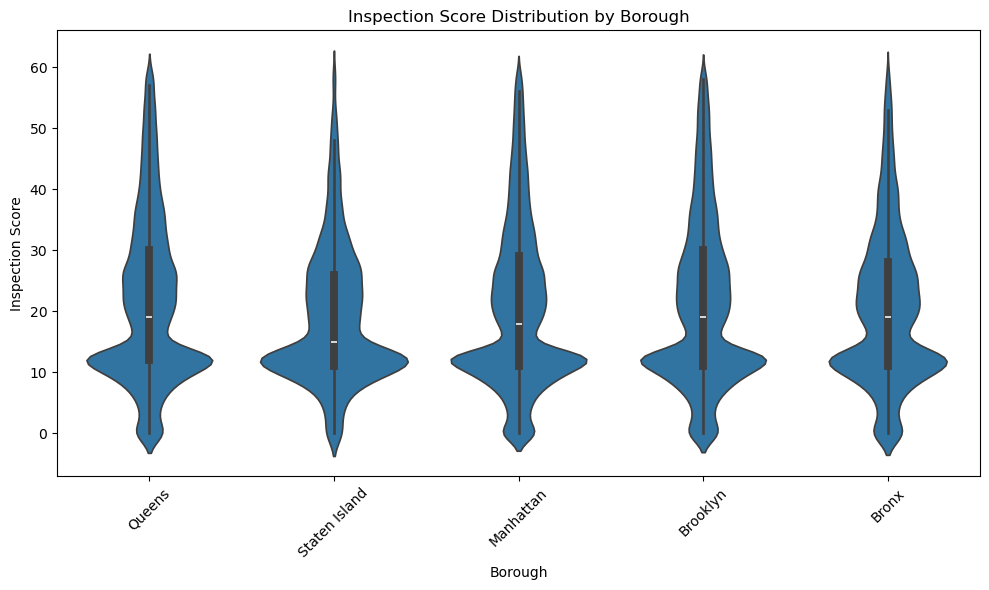

In [10]:
# Plot the violin plot for inspection score by borough
plt.figure(figsize=(10, 6))
sns.violinplot(x='borough', y='score', data=inspections_df)
plt.title('Inspection Score Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Inspection Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

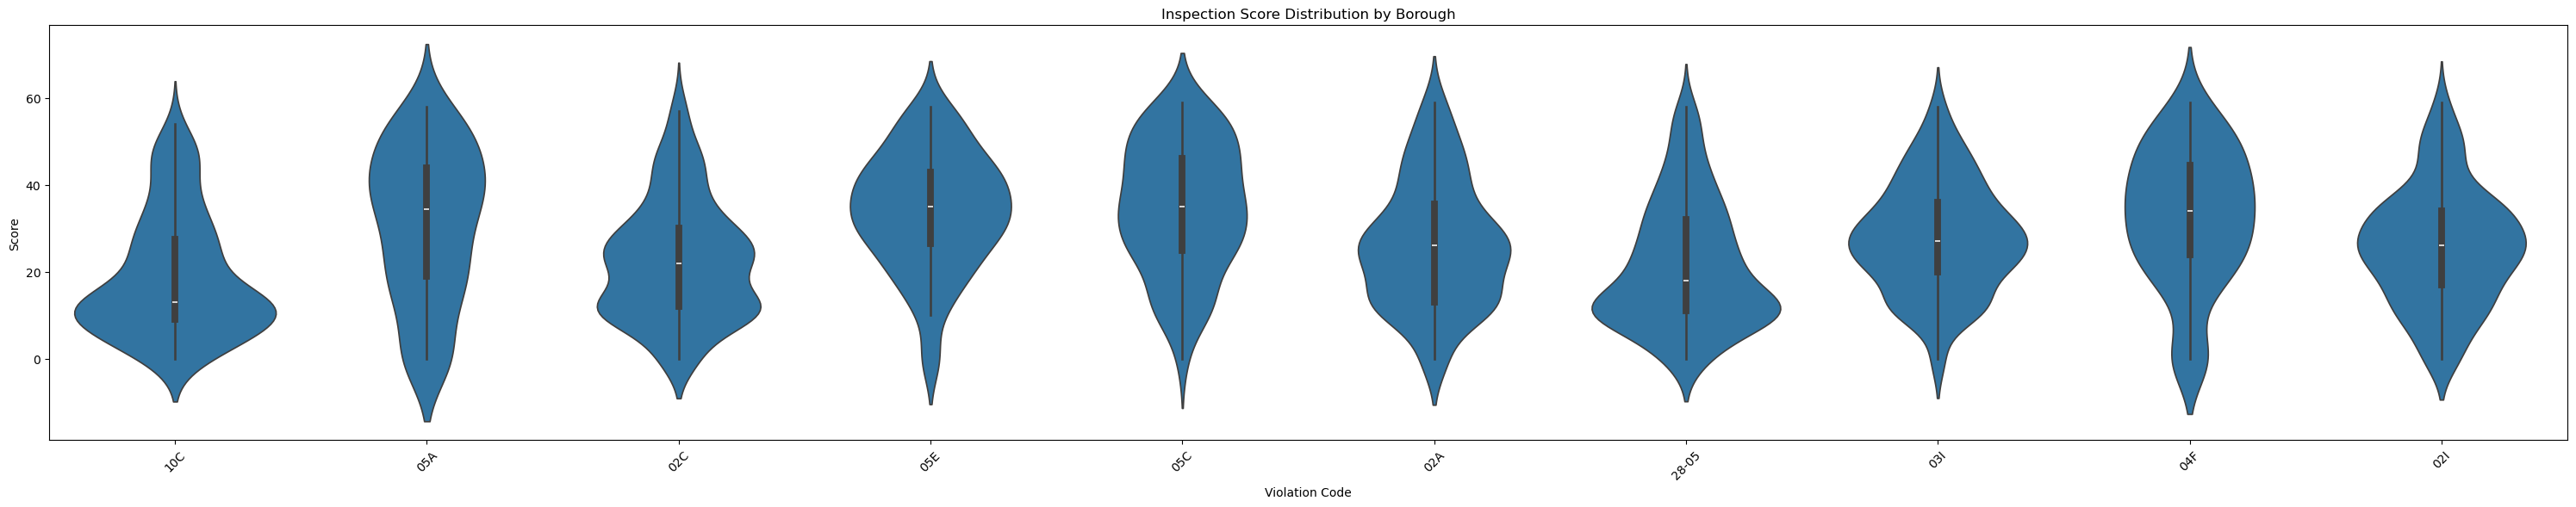

In [11]:
# Count the occurrences of each violation code
violation_counts = inspections_df['violation_code'].value_counts().sort_values()

# Select the Top Violation Codes
top_violation_codes = violation_counts.head(10).index

# Filter the Data
filtered_data = inspections_df[inspections_df['violation_code'].isin(top_violation_codes)]

# Plot the violin plot for inspection score by borough
plt.figure(figsize=(30, 6))
sns.violinplot(x='violation_code', y='score', data=filtered_data)
plt.title('Inspection Score Distribution by Borough')
plt.xlabel('Violation Code')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

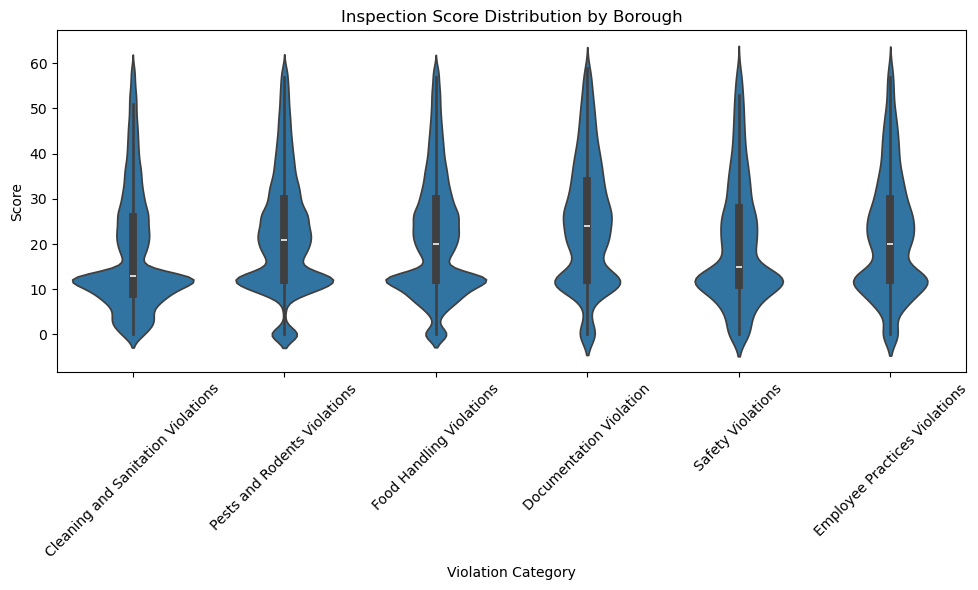

In [12]:
# Plot the violin plot for inspection score by borough
plt.figure(figsize=(10, 6))
sns.violinplot(x='violation_category', y='score', data=inspections_df)
plt.title('Inspection Score Distribution by Borough')
plt.xlabel('Violation Category')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

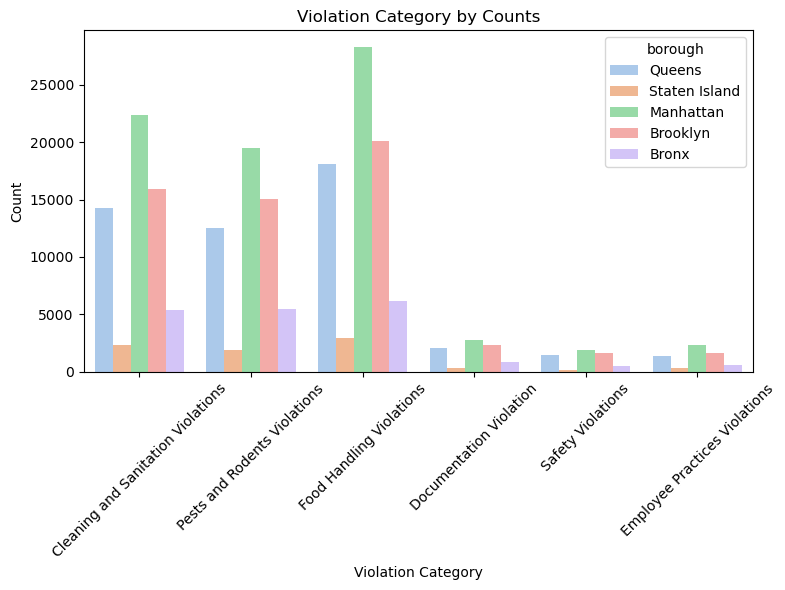

In [13]:
# Plotting the Violation Categories by Count
plt.figure(figsize=(8, 6))
sns.countplot(x='violation_category', data=inspections_df, hue='borough', palette='pastel')
plt.title('Violation Category by Counts')
plt.xlabel('Violation Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

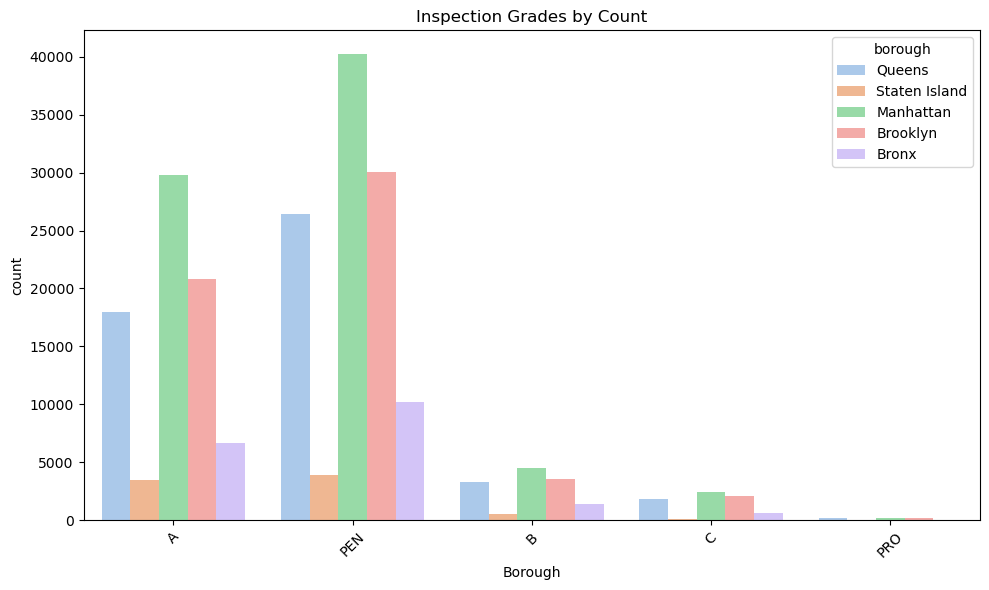

In [14]:
# Plotting the average inspection grades by borough
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', data=inspections_df, hue='borough', palette='pastel')
plt.title('Inspection Grades by Count')
plt.xlabel('Borough')
plt.tight_layout()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
len(inspections_df['violation_code'].value_counts())

49

In [16]:
establishment_df = pd.read_csv('CSV Files/establishment_analysis.csv')
establishment_df

,establishment_id,establishment_name,inspection_date,average_score,num_violations
0,41541793,SOPHIE'S CUBAN CUISINE,2024-04-09,59,6
1,50085140,SOLIMAR GRILL,2022-03-03,59,7
2,41645644,"THE RITZ-CARLTON HOTEL, AUDEN",2023-06-29,59,7
3,40423403,LA DELICE PASTRY SHOP,2024-03-21,59,6
4,50044250,FUJI JAPANESE CUISINE,2018-07-07,59,6
...,...,...,...,...,...
131999,30075445,MORRIS PARK BAKE SHOP,2021-08-10,5,1
132000,30075445,MORRIS PARK BAKE SHOP,2023-08-01,38,3
132001,30075445,MORRIS PARK BAKE SHOP,2023-08-22,12,3
132002,30075445,MORRIS PARK BAKE SHOP,2023-02-03,13,2


In [22]:
establishment_df['average_score'].value_counts().sort_values(ascending=False)

average_score
12    15480
13    12256
10     9634
9      7402
7      7024
11     6602
2      5728
5      5120
0      3976
8      3408
22     2676
19     2658
4      2630
21     2580
20     2512
23     2358
27     2304
26     2190
24     2166
25     2092
18     2080
3      2054
17     2008
16     1742
28     1552
30     1430
29     1374
6      1326
14     1244
33     1242
31     1220
32     1118
35      972
15      942
36      820
34      814
37      810
38      742
40      680
39      632
43      564
41      554
42      548
45      494
46      418
44      406
48      398
47      376
50      330
49      302
53      292
52      280
51      270
54      226
56      222
55      216
58      194
57      158
59      158
Name: count, dtype: int64

In [24]:
establishment_df['num_violations'].value_counts().sort_index(ascending=True)

num_violations
1     18358
2     38970
3     29368
4     17790
5     12098
6      7598
7      4068
8      2102
9      1012
10      458
11      124
12       44
13       10
14        2
15        2
Name: count, dtype: int64

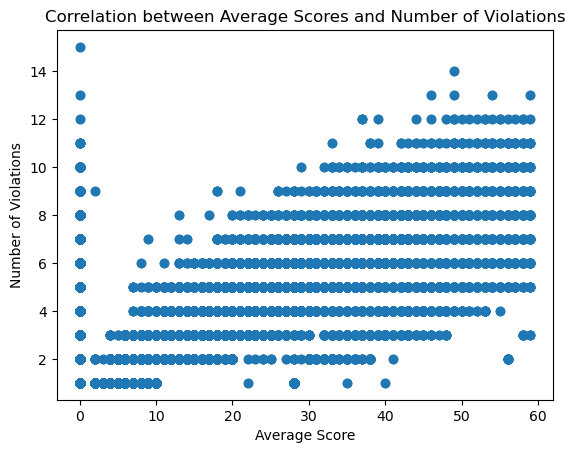

In [26]:
#Create a Scatterplot to visualize correlation

plt.scatter(establishment_df['average_score'], establishment_df['num_violations'])
plt.xlabel('Average Score')
plt.ylabel('Number of Violations')
plt.title('Correlation between Average Scores and Number of Violations')
plt.show()

In [28]:
correlation_coefficient = np.corrcoef(establishment_df['average_score'], establishment_df['num_violations'])[0, 1]
correlation_coefficient

0.7790949680861007

In [29]:
#There IS somewhat of a correlation between the average score and the number of violations
#If you get more violations, chances are you will get a high score (the higher the score, the lower the grade)